In [362]:
import pandas as pd
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

```python
    # example of set plot stylesheet 
    plt.rcParams.update(bundles.icml2023(column='full', nrows=1, ncols=2, usetex=False))

    plt.savefig('figname_cml.pdf')

``````

# load data as csv files

In [376]:
# dMonday = pd.read_csv(r'/Users/danielbischoff/Library/CloudStorage/OneDrive-UTCloud/Documents - Dateien von Philipp Langsteiner/Data_literacy_mensa/Mensa_data_time_formated/080124Monday.csv')
dTuesday = pd.read_csv(r'/Users/danielbischoff/Library/CloudStorage/OneDrive-UTCloud/Documents - Dateien von Philipp Langsteiner/Data_literacy_mensa/Mensa_data_time_formated/090124Tuesday.csv')
# dWednesday = pd.read_csv(r'/Users/danielbischoff/Library/CloudStorage/OneDrive-UTCloud/Documents - Dateien von Philipp Langsteiner/Data_literacy_mensa/Mensa_data_time_formated/100124Wednesday.csv')
# dThursday = pd.read_csv(r'/Users/danielbischoff/Library/CloudStorage/OneDrive-UTCloud/Documents - Dateien von Philipp Langsteiner/Data_literacy_mensa/Mensa_data_time_formated/110124Thursday.csv')
# dFriday = pd.read_csv(r'/Users/danielbischoff/Library/CloudStorage/OneDrive-UTCloud/Documents - Dateien von Philipp Langsteiner/Data_literacy_mensa/Mensa_data_time_formated/120124Friday.csv')

In [ ]:
dTuesday = pd.read_csv(r'/Users/danielbischoff/Library/CloudStorage/OneDrive-UTCloud/Documents - Dateien von Philipp Langsteiner/Data_literacy_mensa/Mensa_data_combined/Tuesday090124.csv')

## Change data types and reasure right loaded csv

In [367]:
def changeDataTypes(data):

    data['frame.time'] = pd.to_datetime(data['frame.time'], format='ISO8601')
    data = data.drop('Unnamed: 0', axis=1)

    return data

In [368]:
# dMonday = changeDataTypes(dMonday)
dTuesday = changeDataTypes(dTuesday)
# dWednesday = changeDataTypes(dWednesday)
# dThursday = changeDataTypes(dThursday)
# dFriday = changeDataTypes(dFriday)

# filter data to keep only requested data

In [369]:
# filter for devices that comunicate with an cisco router
def filter(data):
    # data = data.copy()
    eduroam_ssid = '656475726f616d'

    # The ^ tell the regular expression, that it start with the pattern that follows
    cisco_pattern = '^' + '00:f6:63:'

    d_dpa = data.loc[data['_ws.col.protocol'] == 'EAP']

    # Authentication with all cisco devices
    df_dpa_cisco = d_dpa.loc[d_dpa['wlan.sa'].str.match(cisco_pattern)]

    # Authenticated mac addresses as a list
    dpa_cisco_list = df_dpa_cisco['wlan.da'].unique().tolist()

    # all unique mac addresses with the ssids
    # all_sources = data['wlan.sa'].unique().tolist()

    # # Combination of mac addresses of the ssids and EPA
    # combined_macs = list(set(all_sources + dpa_cisco_list))
    combined_macs = dpa_cisco_list
    print(f'Number of unqiue mac addresses verfied by cisco: {df_dpa_cisco["wlan.da"].nunique()}')

    # Drop NaNs and sort for time
    data.dropna(subset=['wlan.sa'], inplace = True)
    data['wlan.ssid'].value_counts().sort_index(inplace=True)

    # All entries that use the resulting mac addresses
    return data.loc[data['wlan.sa'].isin(combined_macs)]

In [388]:
dTuesday.index

Index([      1,       3,       5,       9,      11,      14,      19,      20,
            21,      22,
       ...
       1349345, 1349376, 1349383, 1349384, 1349385, 1349386, 1349387, 1349388,
       1349389, 1349395],
      dtype='int64', length=581615)

In [386]:
# use filter method
# dFilteredMonday  = filter(dMonday)
dFilteredTuesday  = filter(dTuesday)
# dFilteredWednesday  = filter(dWednesday)
# dFilteredThursday  = filter(dThursday)
# dFilteredFriday  = filter(dFriday)

Number of unqiue mac addresses verfied by cisco: 329


In [387]:
dFilteredTuesday

,Unnamed: 0,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid
29092,29092,2024-01-09 11:22:42.745211+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
29170,29170,2024-01-09 11:22:47.389294+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
29171,29171,2024-01-09 11:22:47.409550+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
30141,30141,2024-01-09 11:23:42.545631+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
30397,30397,2024-01-09 11:23:55.304075+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
...,...,...,...,...,...,...
1347198,1347198,2024-01-09 14:08:07.667522+01:00,4a:73:1b:a4:8a:42,ff:ff:ff:ff:ff:ff,802.11,<MISSING>
1347207,1347207,2024-01-09 14:08:07.687698+01:00,4a:73:1b:a4:8a:42,ff:ff:ff:ff:ff:ff,802.11,<MISSING>
1349100,1349100,2024-01-09 14:08:12.187766+01:00,fa:2b:00:f8:ed:8d,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
1349104,1349104,2024-01-09 14:08:12.208890+01:00,fa:2b:00:f8:ed:8d,ff:ff:ff:ff:ff:ff,802.11,65546e726fd26c


# Create Dataframe first and last seen

In [373]:
# dFirstMonday = dFilteredMonday.drop_duplicates(subset='wlan.sa', keep='first').sort_index()
# dLastMonday = dFilteredMonday.drop_duplicates(subset='wlan.sa', keep='last').sort_index()
dFirstTuesday = dFilteredTuesday.drop_duplicates(subset='wlan.sa', keep='first').sort_index()
dLastTuesday = dFilteredTuesday.drop_duplicates(subset='wlan.sa', keep='last').sort_index()
# dFirstWednesday = dFilteredWednesday.drop_duplicates(subset='wlan.sa', keep='first').sort_index()
# dLastWednesday = dFilteredWednesday.drop_duplicates(subset='wlan.sa', keep='last').sort_index()
# dFirstThursday = dFilteredThursday.drop_duplicates(subset='wlan.sa', keep='first').sort_index()
# dLastThursday = dFilteredThursday.drop_duplicates(subset='wlan.sa', keep='last').sort_index()
# dFirstFriday = dFilteredFriday.drop_duplicates(subset='wlan.sa', keep='first').sort_index()
# dLastFriday = dFilteredFriday.drop_duplicates(subset='wlan.sa', keep='last').sort_index()

In [382]:
dFirstTuesday

,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid
29092,2024-01-09 11:22:42.745211+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
35583,2024-01-09 11:28:49.538549+01:00,66:42:b5:5f:88:ab,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
38741,2024-01-09 11:31:55.217319+01:00,f8:ff:c2:32:e8:cf,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
42863,2024-01-09 11:35:46.284996+01:00,26:72:78:81:b6:54,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
56704,2024-01-09 11:47:00.172463+01:00,26:37:e6:4f:d7:a4,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
...,...,...,...,...,...
1251293,2024-01-09 14:02:18.338255+01:00,12:5b:db:56:a5:9a,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
1268225,2024-01-09 14:03:26.821137+01:00,46:0b:51:21:b7:83,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
1280492,2024-01-09 14:04:08.361903+01:00,b2:68:db:03:92:61,ff:ff:ff:ff:ff:ff,802.11,65647572affda5
1290700,2024-01-09 14:04:42.642752+01:00,06:e3:5a:6a:a1:ae,ff:ff:ff:ff:ff:ff,802.11,656475726f616d


In [349]:
dFirstTuesday.set_index('frame.time', inplace=True)
d1CountFirstTuesday = ResampleToXTime('1', dFirstTuesday)

In [350]:
d1CountFirstTuesday

,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid
0,2024-01-09 11:22:00+01:00,ea:a6:20:c3:65:8c,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
1,2024-01-09 11:23:00+01:00,0,0,0,0
2,2024-01-09 11:24:00+01:00,0,0,0,0
3,2024-01-09 11:25:00+01:00,0,0,0,0
4,2024-01-09 11:26:00+01:00,0,0,0,0
...,...,...,...,...,...
158,2024-01-09 14:00:00+01:00,0,0,0,0
159,2024-01-09 14:01:00+01:00,66:34:90:7b:5d:40,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
160,2024-01-09 14:02:00+01:00,12:5b:db:56:a5:9a,ff:ff:ff:ff:ff:ff,802.11,656475726f616d
161,2024-01-09 14:03:00+01:00,46:0b:51:21:b7:83,ff:ff:ff:ff:ff:ff,802.11,656475726f616d


# Create Dataframe count of first and last seen add

In [334]:
dCountFirstMonday = pd.DataFrame(dFirstMonday['frame.time'].value_counts().sort_index())
dCountLastMonday = pd.DataFrame(dLastMonday['frame.time'].value_counts().sort_index())
dCountFirstTuesday = pd.DataFrame(dFirstTuesday['frame.time'].value_counts().sort_index())
dCountLastTuesday = pd.DataFrame(dLastTuesday['frame.time'].value_counts().sort_index())
dCountFirstWednesday = pd.DataFrame(dFirstWednesday['frame.time'].value_counts().sort_index())
dCountLastWednesday = pd.DataFrame(dLastWednesday['frame.time'].value_counts().sort_index())
dCountFirstThursday = pd.DataFrame(dFirstThursday['frame.time'].value_counts().sort_index())
dCountLastThursday = pd.DataFrame(dLastThursday['frame.time'].value_counts().sort_index())
dCountFirstFriday = pd.DataFrame(dFirstFriday['frame.time'].value_counts().sort_index())
dCountLastFriday = pd.DataFrame(dLastFriday['frame.time'].value_counts().sort_index())

# Create Dataframe count of frist and last sean mac add every x min

In [335]:
def ResampleToXTime(periode, data):

    # Set 'time' column as index
    # data.set_index('frame.time', inplace=True)

    # Resample and sum up 'count' every x minutes
    resampled_data = data.resample(periode + 'Min').sum()

    # # Reset index
    resampled_data.reset_index(inplace=True)

    return resampled_data

In [336]:
d5CountFirstMonday = ResampleToXTime('5', dCountFirstMonday)
d5CountLastMonday = ResampleToXTime('5', dCountLastMonday)
d5CountFirstTuesday = ResampleToXTime('5', dCountFirstTuesday)
d5CountLastTuesday = ResampleToXTime('5', dCountLastTuesday)
d5CountFirstWednesday = ResampleToXTime('5', dCountFirstWednesday)
d5CountLastWednesday = ResampleToXTime('5', dCountLastWednesday)
d5CountFirstThursday = ResampleToXTime('5', dCountFirstThursday)
d5CountLastThursday = ResampleToXTime('5', dCountLastThursday)
d5CountFirstFriday = ResampleToXTime('5', dCountFirstFriday)
d5CountLastFriday = ResampleToXTime('5', dCountLastFriday)

In [264]:
#  only keeps the time of data frames
def keepOnlyTime(data):
    data = data.copy()
    data['frame.time'] = data['frame.time'].dt.time.astype(str)
    data["frame.time"] = data["frame.time"].str.replace(r':\d{2}$', '', regex=True)

    return data

In [323]:
# convert to only keep time in string format
d5timeCountFirstMonday = keepOnlyTime(d5CountFirstMonday).sort_index()
d5timeCountLastMonday = keepOnlyTime(d5CountLastMonday).sort_index()
d5timeCountFirstTuesday = keepOnlyTime(d5CountFirstTuesday).sort_index()
d5timeCountLastTuesday = keepOnlyTime(d5CountLastTuesday).sort_index()
d5timeCountFirstWednesday = keepOnlyTime(d5CountFirstWednesday).sort_index()
d5timeCountLastWednesday = keepOnlyTime(d5CountLastWednesday).sort_index()
d5timeCountFirstThursday = keepOnlyTime(d5CountFirstThursday).sort_index()
d5timeCountLastThursday = keepOnlyTime(d5CountLastThursday).sort_index()
d5timeCountFirstFriday = keepOnlyTime(d5CountFirstFriday).sort_index()
d5timeCountLastFriday = keepOnlyTime(d5CountLastFriday).sort_index()

# Plot Results


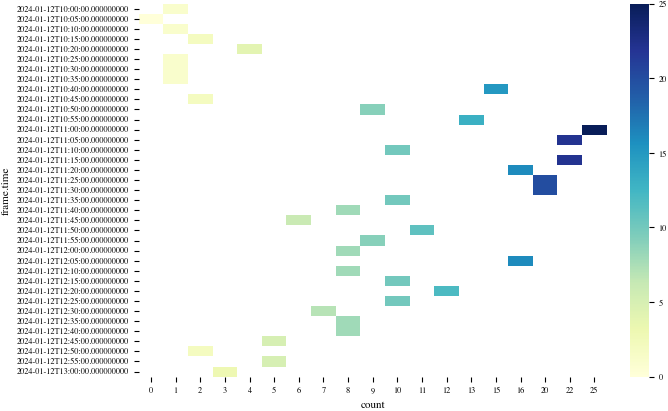

In [381]:
import seaborn as sns
def plotheat(data, day):
# Assuming df is your DataFrame and 'day' is the day of the week
    pivot_df = data.pivot(index='frame.time', columns=day, values='count')

# Create heatmap
    sns.heatmap(pivot_df, cmap='YlGnBu')

    plt.show()
plotheat(d5CountFirstFriday,'count')

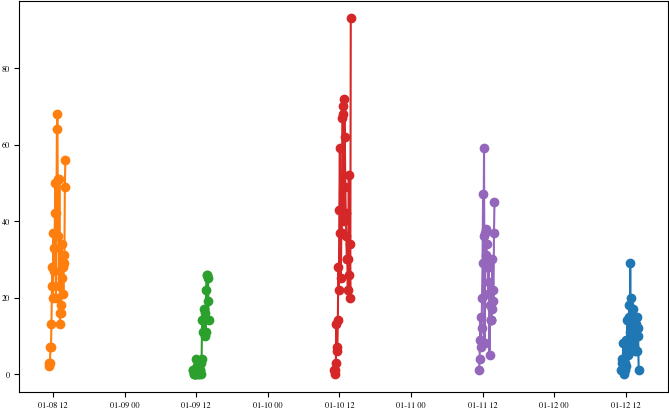

In [378]:
plt.plot(d5CountLastFriday['frame.time'],d5CountLastFriday['count'], marker='o')
plt.plot(d5CountLastMonday['frame.time'], d5CountLastMonday['count'], marker='o')
plt.plot(d5CountLastTuesday['frame.time'], d5CountLastTuesday['count'], marker='o')
plt.plot(d5CountLastWednesday['frame.time'], d5CountLastWednesday['count'], marker='o')
plt.plot(d5CountLastThursday['frame.time'], d5CountLastThursday['count'], marker='o')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


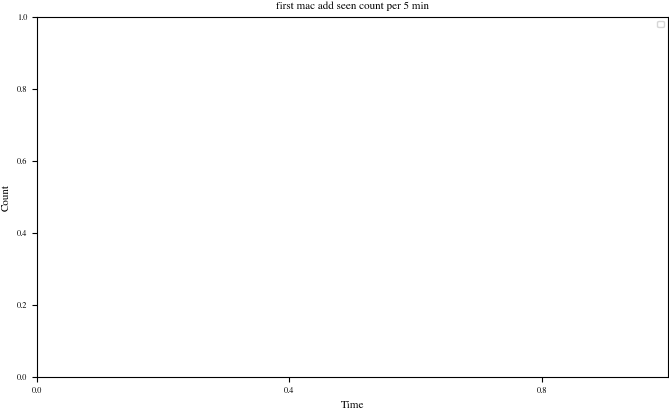

In [325]:
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=1, usetex=False))

# plt.plot(d5timeCountFirstMonday['frame.time'], d5timeCountFirstMonday['count'], marker='o', label='monday')
# plt.plot(d5timeCountFirstTuesday['frame.time'], d5timeCountFirstTuesday['count'], marker='*', label='Tuesday')
# plt.plot(d5timeCountFirstWednesday['frame.time'], d5timeCountFirstWednesday['count'], marker='+', label='wednesday')
# plt.plot(d5timeCountFirstThursday['frame.time'], d5timeCountFirstThursday['count'], marker='|', label='thursday')
# plt.plot(d5timeCountFirstFriday['frame.time'], d5timeCountFirstFriday['count'], marker='_', label='friday')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.title('first mac add seen count per 5 min')

# Get current ticks
locs, labels = plt.xticks()

# Set new ticks 
plt.xticks(locs[::2])


plt.savefig('first_seen_mac_per_5_min.pdf')

In [277]:
d5timeCountLastFriday

,frame.time,count
0,11:15,1
1,11:20,3
2,11:25,4
3,11:30,4
4,11:35,8
5,11:40,4
6,11:45,0
7,11:50,1
8,11:55,3
9,12:00,2


In [322]:
d5timeCountLastFriday

,frame.time,count
0,11:15,1
1,11:20,3
2,11:25,4
3,11:30,4
4,11:35,8
5,11:40,4
6,11:45,0
7,11:50,1
8,11:55,3
9,12:00,2


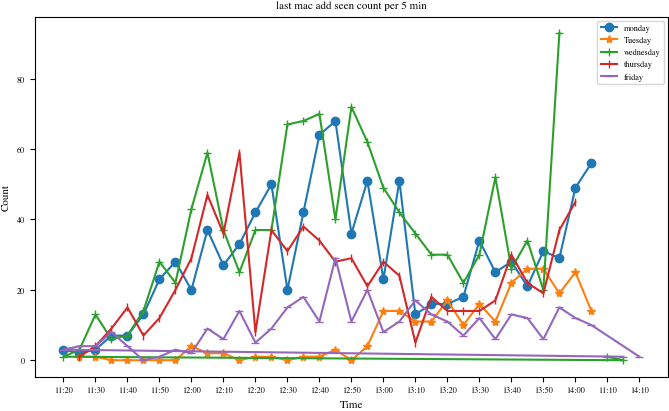

In [321]:
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=1, usetex=False))

plt.plot(d5timeCountLastMonday['frame.time'], d5timeCountLastMonday['count'], marker='o', label='monday')
plt.plot(d5timeCountLastTuesday['frame.time'], d5timeCountLastTuesday['count'], marker='*', label='Tuesday')
plt.plot(d5timeCountLastWednesday['frame.time'], d5timeCountLastWednesday['count'], marker='+', label='wednesday')
plt.plot(d5timeCountLastThursday['frame.time'], d5timeCountLastThursday['count'], marker='|', label='thursday')
plt.plot(d5timeCountLastFriday['frame.time'], d5timeCountLastFriday['count'], marker='_', label='friday')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.title('last mac add seen count per 5 min')

# Get current ticks
locs, labels = plt.xticks()

# Set new ticks 
plt.xticks(locs[::2])

plt.savefig('last_seen_mac_per_5_min.pdf')

## Cumulative sum
subtract frist seen count from last seen count add compute the cumulative sum

In [256]:
def getCumSum(dataFirst, dataLast):
    data = dataLast.copy()
    data['count'] = np.cumsum(dataFirst['count'] - dataLast['count'])

    return data

In [257]:
d5CumSumMonday = getCumSum(d5timeCountFirstMonday, d5timeCountLastMonday)
d5CumSumTuesday = getCumSum(d5timeCountFirstTuesday, d5timeCountLastTuesday)
d5CumSumWednesday = getCumSum(d5timeCountFirstWednesday, d5timeCountLastWednesday)
d5CumSumThursday = getCumSum(d5timeCountFirstThursday, d5timeCountLastThursday)
d5CumSumFriday = getCumSum(d5timeCountFirstFriday, d5timeCountLastFriday)

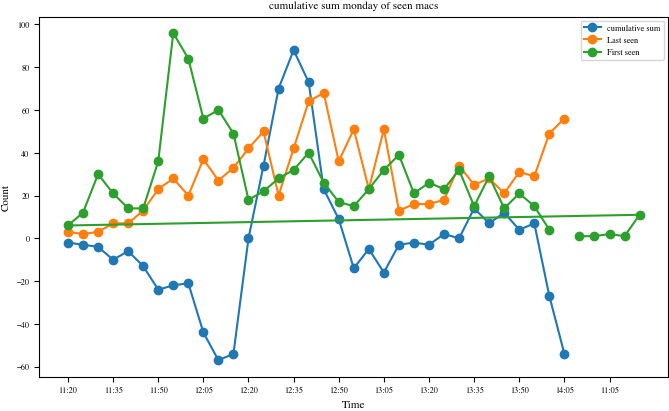

In [258]:
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=1, usetex=False))

plt.plot(d5CumSumMonday['frame.time'], d5CumSumMonday['count'], marker='o', label='cumulative sum')
plt.plot(d5timeCountLastMonday['frame.time'], d5timeCountLastMonday['count'], marker='o', label='Last seen')
plt.plot(d5timeCountFirstMonday['frame.time'], d5timeCountFirstMonday['count'], marker='o', label='First seen')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.title('cumulative sum monday of seen macs')

# Get current ticks
locs, labels = plt.xticks()

# Set new ticks 
plt.xticks(locs[::3])

plt.savefig('cumSumMonday.pdf')